### Linear Discriminant Analysis

In [7]:
from sklearn import datasets
wine = datasets.load_wine()

from sklearn.model_selection import train_test_split
X = wine.data
Y = wine.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state = 123456)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

X_lda = lda.fit(X_train, Y_train)
Y_pred1 = lda.predict(X_test)
Y_pred1

from sklearn.metrics import accuracy_score
acc1 = accuracy_score(Y_test, Y_pred1)
acc1

0.9830508474576272

### KNN Method

In [6]:
from sklearn import datasets
wine = datasets.load_wine()
from sklearn.model_selection import train_test_split
X = wine.data
Y = wine.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state = 123456)

import pandas as pd
X_wineDF = pd.DataFrame(wine.data, columns = wine.feature_names)
Y_wineDF = pd.Categorical.from_codes(wine.target, wine.target_names)
wineDF = X_wineDF.join(pd.Series(Y_wineDF, name = 'Class'))
wineDF.head()

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':range(1,30)}
GS = GridSearchCV(KNeighborsClassifier(), param_grid, scoring = 'accuracy')
GS.fit(X_train, Y_train)

GS.best_params_

GS.best_score_

from sklearn.metrics import accuracy_score
KNNClassifier = KNeighborsClassifier(n_neighbors=16)
KNNClassifier.fit(X_train, Y_train)
Y_pred2 = KNNClassifier.predict(X_test)
acc2 = accuracy_score(Y_test, Y_pred2)
acc2

0.7627118644067796

### Multiclass Logistic Regression

In [8]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaledtrain = scaler.transform(X_train)
X_scaledtest = scaler.transform(X_test)
mlgr = LogisticRegression(multi_class='auto')
mlgr.fit(X_scaledtrain, Y_train)

Y_pred3 = mlgr.predict(X_scaledtest)
Y_pred3

acc3 = accuracy_score(Y_test, Y_pred3)
acc3

X_train.shape, X_test.shape
acc3 = accuracy_score(Y_test, Y_pred3)
acc3

0.9830508474576272

### Decision Tree

0.9322033898305084

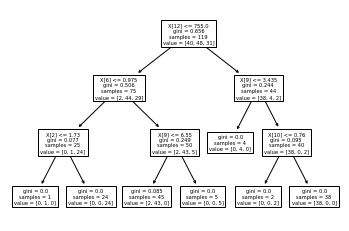

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, tree   # The tree module contains Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

DT = DecisionTreeClassifier(max_depth=3)
DT.fit(X_train, Y_train)
tree.plot_tree(DT)

Y_pred4 = DT.predict(X_test)
acc4 = accuracy_score(Y_pred4, Y_test)
acc4



In [11]:
max(acc1, acc2, acc3, acc4)

0.9830508474576272

***The maximum accuray is obtained in the Linear Discriminant Analysis Approach.***

Q1

In [ ]:
from sklearn import datasets 
import pandas as pd

import numpy as np 
from sklearn.model_selection import train_test_split
data=datasets.load_diabetes()
data

x=data.data
x
y=data.target
y
kk=np.corrcoef(x.T,y)[:,-1]
kk

import matplotlib.pyplot as plt
plt.scatter(y,x[:,2])

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=1322222)

from sklearn.linear_model import LinearRegression
ff=LinearRegression()
model=ff.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error(y_test,y_pred)
r2_score(y_test,y_pred)

Q.2

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
bc=datasets.load_breast_cancer()
print(bc.DESCR)

x=bc.data
y=1-bc.target

kk=np.corrcoef(x.T,y)[:,-1]
kk

sns.boxplot(y,x[:,2])

from sklearn.model_selection import KFold, cross_validate
from sklearn.linear_model import LogisticRegression
kk=LogisticRegression()
kf=KFold(10,shuffle =True)
cnv=cross_validate(kk,x,y,cv=kf)
score=cnv['test_score']
score

np.mean(score)

#### Naive Bayes

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB   
from sklearn.model_selection import train_test_split


iris = datasets.load_iris()   
iris.feature_names

X = iris.data[:, [0, 2]]      
y = iris.target


gnb = GaussianNB()  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

y_train

X_train

y_pred

X

y

y_test

X_test

x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x0, x1 = np.meshgrid(np.arange(x0_min, x0_max, 0.1),
                     np.arange(x1_min, x1_max, 0.1))
yy = gnb.predict(np.c_[x0.ravel(), x1.ravel()])
yy = yy.reshape(x0.shape)

CS = plt.contourf(x0, x1, yy, levels = [-1, 0, 1, 2])
art, lbl = CS.legend_elements()    
lbl = iris.target_names           
plt.legend(art,lbl, edgecolor = "k")
plt.scatter(X[:, 0], X[:, 1], c=y,s=20, edgecolor='k')
plt.show()

u = np.array([1, 2, 3])
v = np.array([2, 4, 6])
uu, vv = np.meshgrid(u, v)

uu

vv

uu.ravel()

np.c_[uu.ravel(), vv.ravel()]